In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Data Preprocessing

In [9]:
null = pd.DataFrame({'Null Values' : df.isnull().sum(), 'Percentage Null Values' : (df.isnull().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


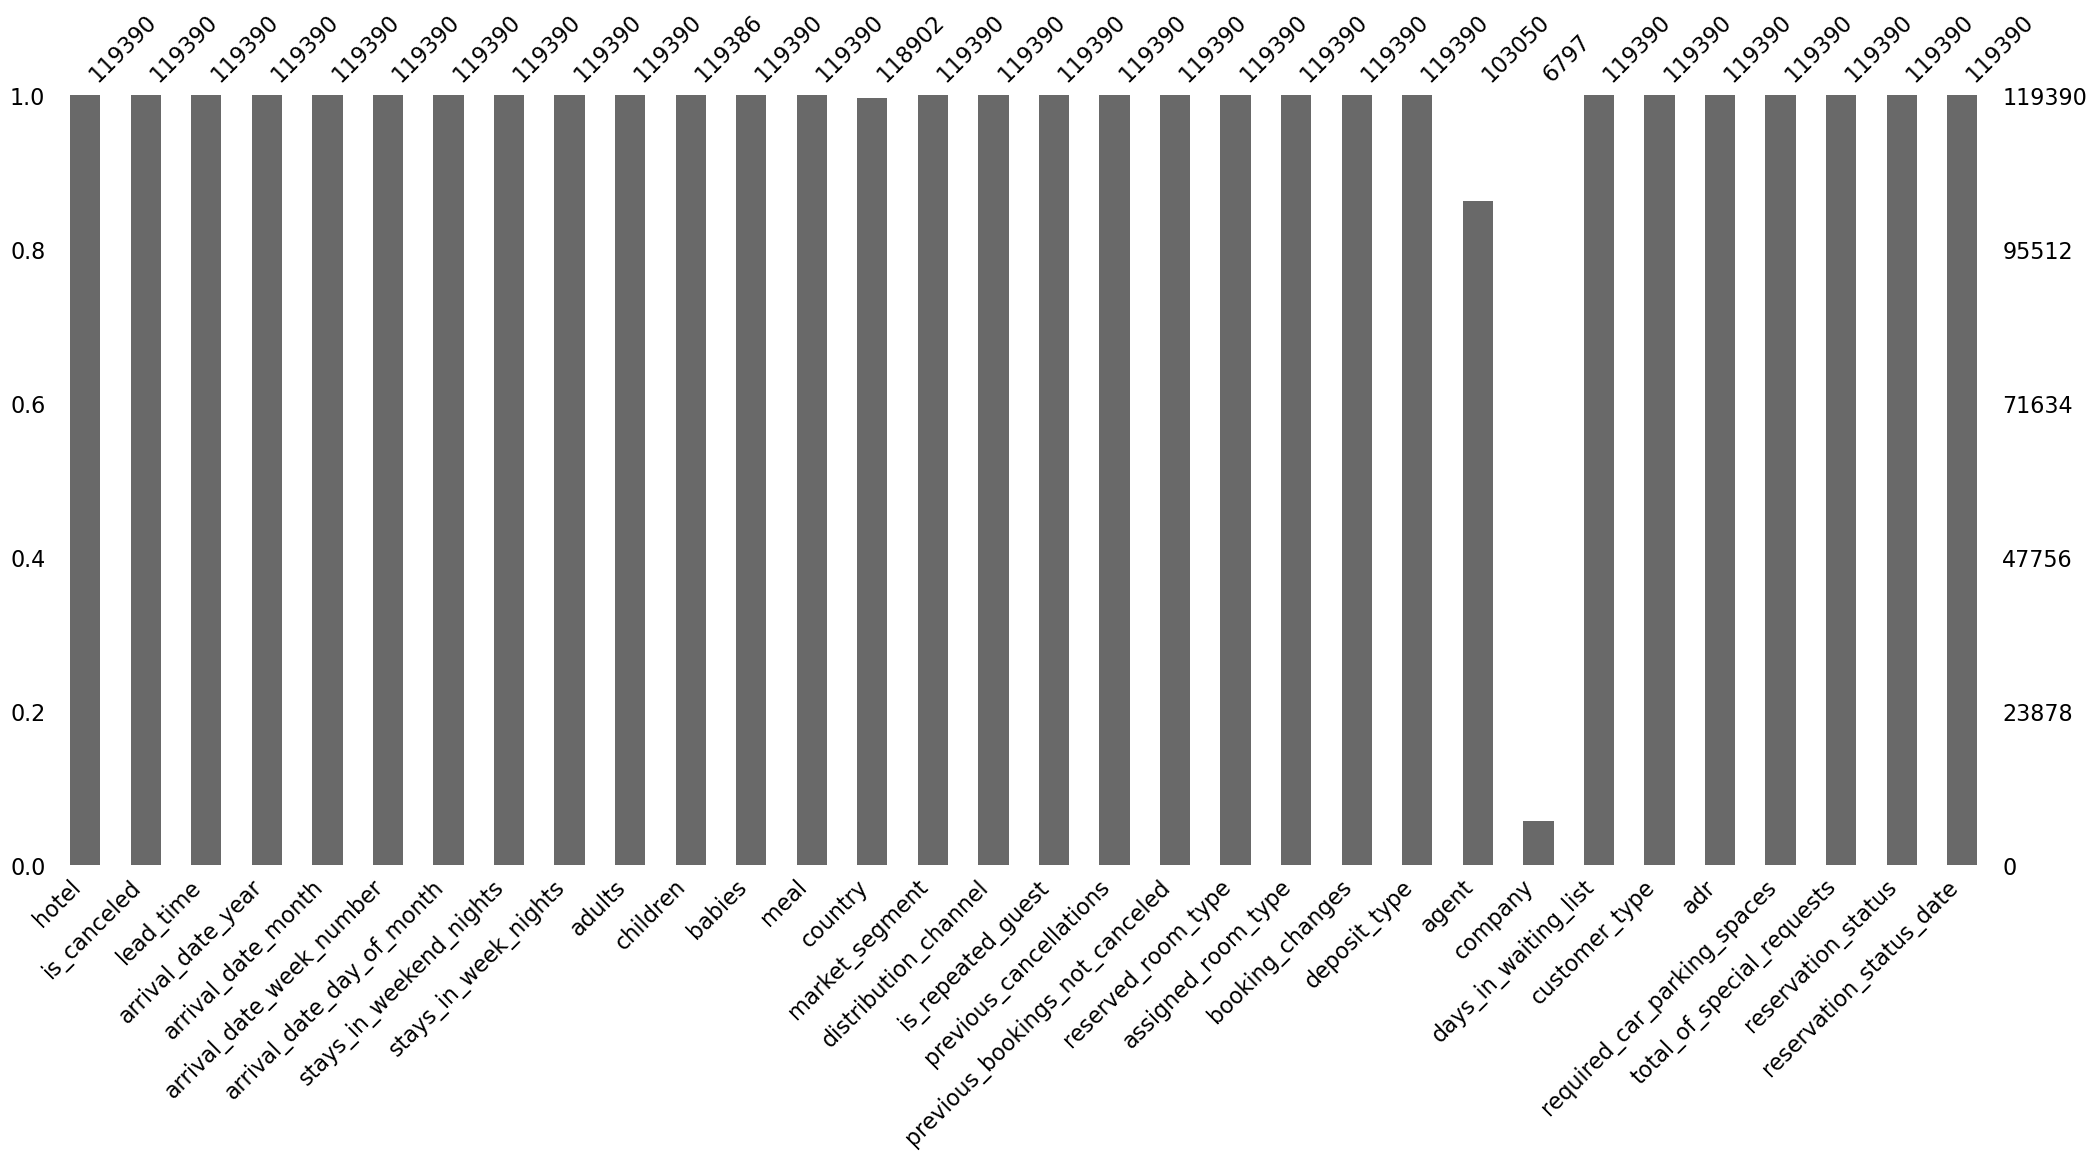

In [15]:
# visualizing null values
msno.bar(df)
plt.show()

In [36]:
null_replacements = {'children' : 0.0, 'country': 'Unknown', 'agent' : 0.0, 'company': 0.0}
df_cleaned = df.fillna(null_replacements)

In [51]:
df_cleaned['meal'].replace('Undefined', 'SC', inplace = True)

In [47]:
zero_guests = list(df_cleaned.loc[df_cleaned['adults'] 
                   + df_cleaned['children']
                   + df_cleaned['babies'] == 0].index)
df_cleaned.drop(df_cleaned.index[zero_guests], inplace = True)

In [55]:
# Ensuring no negative or zero ADR values
df_cleaned = df_cleaned[df_cleaned["adr"] > 0]

# Converting date columns to datetime
date_cols = ["reservation_status_date", "arrival_date_year"]
for col in date_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")

# Reset index after drops
df_cleaned.reset_index(drop=True, inplace=True)

In [56]:
# df_cleaned.to_csv('tourist_bookings_cleaned_dataset_v1.csv', index = False)

### Signal Focused EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

df_cleaned = pd.read_csv('tourist_bookings_cleaned_dataset_v1.csv') 

target = 'is_canceled'

print(df_cleaned.shape)
df_cleaned[target].value_counts(normalize=True)

(117399, 32)


is_canceled
0    0.625116
1    0.374884
Name: proportion, dtype: float64

In [2]:
num_cols = df_cleaned.select_dtypes(include = [np.number]).columns.drop(target)
cat_cols = df_cleaned.select_dtypes(exclude = [np.number]).columns

le = LabelEncoder()
encoded = df_cleaned.copy()
for c in cat_cols:
    encoded[c] = le.fit_transform(encoded[c].astype(str))

# encoded.to_csv('encoded_v3.csv', index = False)

In [3]:
# Mutual Information

# Which columns have the highest relationship with churn.  (Signal Ranking)

mi = mutual_info_classif(encoded[num_cols.tolist() + cat_cols.tolist()],encoded[target])
mi_scores = pd.Series(mi, index = num_cols.tolist() + cat_cols.tolist()).sort_values(ascending = False)
mi_scores.head(15)

reservation_status             0.684453
deposit_type                   0.134031
reservation_status_date        0.131024
lead_time                      0.080432
agent                          0.079539
adr                            0.077490
country                        0.072589
market_segment                 0.042251
previous_cancellations         0.042222
total_of_special_requests      0.038926
required_car_parking_spaces    0.031507
distribution_channel           0.023751
assigned_room_type             0.021115
booking_changes                0.018464
customer_type                  0.016434
dtype: float64

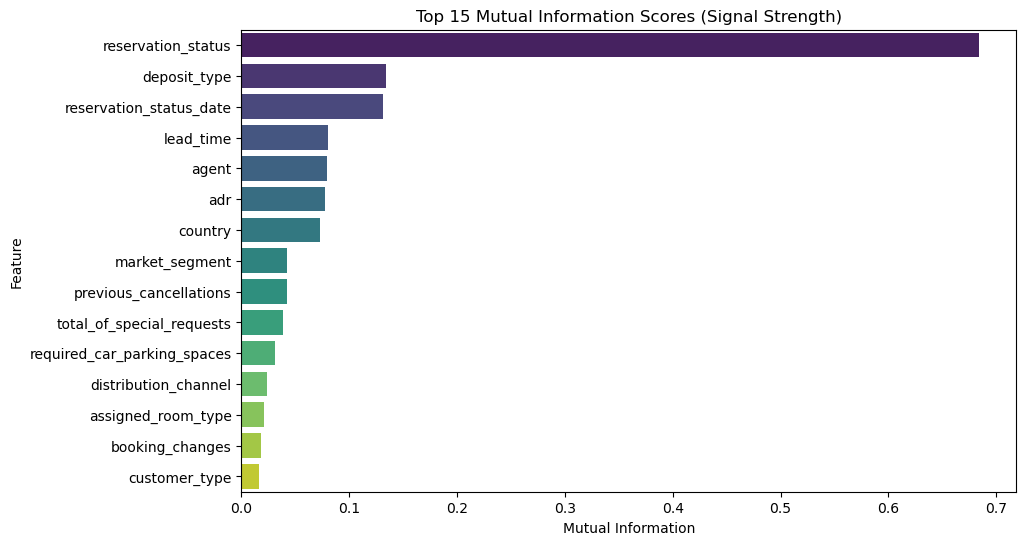

In [4]:
plt.figure(figsize = (10,6))
sns.barplot(x = mi_scores.head(15), y = mi_scores.head(15).index, palette = 'viridis')
plt.title('Top 15 Mutual Information Scores (Signal Strength)')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

In [5]:
# Target Linked Mean Differences  (for categoricals)

# In which market segments do cancellation spikes ?

target_means = {}
for col in cat_cols:
    target_means[col] = df_cleaned.groupby(col)[target].mean().sort_values(ascending = False)

target_means['market_segment'].head()

market_segment
Undefined        1.000000
Groups           0.617324
Online TA        0.369395
Offline TA/TO    0.346284
Aviation         0.220779
Name: is_canceled, dtype: float64

In [6]:
# Correlation Check

# Will show us linear signal strength - which numeric variables move with chun probability.

corr = encoded[num_cols].corrwith(encoded[target]).abs().sort_values(ascending = False)
corr.head(10)

lead_time                         0.290513
total_of_special_requests         0.237318
required_car_parking_spaces       0.197514
booking_changes                   0.144591
previous_cancellations            0.110667
company                           0.083485
is_repeated_guest                 0.074545
adults                            0.056278
previous_bookings_not_canceled    0.054843
days_in_waiting_list              0.054103
dtype: float64

In [7]:
signal_map = pd.DataFrame({'Feature': mi_scores.index,
                           'Mutual_Info': mi_scores.values,
                          'Abs_Corr': corr.reindex(mi_scores.index).values
                          })
# signal_map.to_csv('signal_map_v3.csv', index = False)

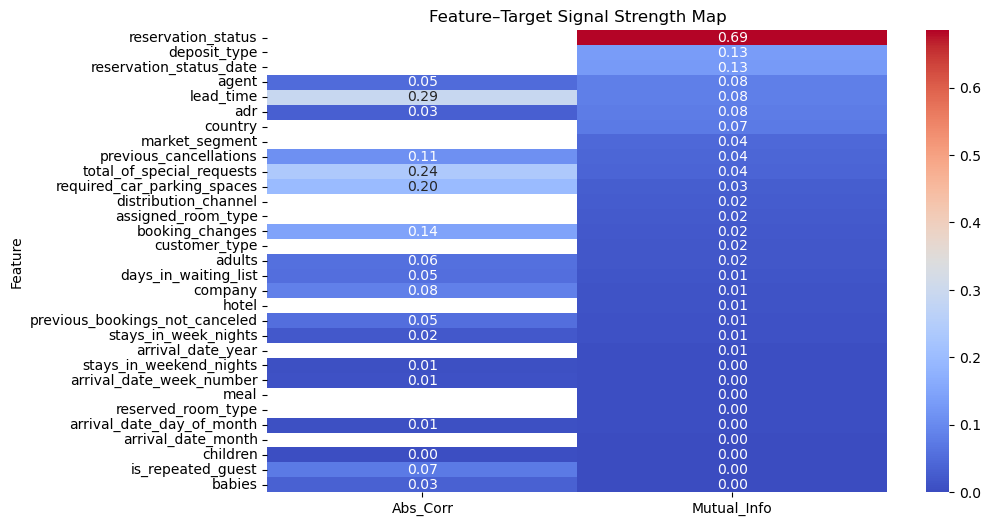

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(signal_map.set_index('Feature')[['Abs_Corr', 'Mutual_Info']],
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature–Target Signal Strength Map")
plt.show()